In [1]:
from Postprocess_functions import *

Welcome to JupyROOT 6.26/10


In [2]:
import gmsh
import sys
import os
from os.path import exists
import subprocess
import numpy as np
import time
import ROOT
from os import listdir
from os.path import isfile, join
import os.path
from os import path
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import argparse
from ROOT import TFile, TTree
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev,splprep
from scipy.interpolate import BSpline
import math

In [3]:
import matplotlib as mpl

def setup_pgf():
    pgf_with_latex = {
        "pgf.texsystem": "pdflatex",
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": [],
        "font.sans-serif": [],
        "font.monospace": [],
        "axes.labelsize": 10,
        "font.size": 10,
        "legend.fontsize": 4,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
        "pgf.preamble": "\n".join([
            r"\usepackage[utf8]{inputenc}",
            r"\usepackage[T1]{fontenc}",
            r"\usepackage[detect-all]{siunitx}",
        ])
    }
    mpl.use("pgf")
    mpl.rcParams.update(pgf_with_latex)
 # Set the figure size

    # Set the figure size based on LaTeX geometry settings
    geometry_textwidth = 384  # pt
    pt_to_inch = 1.0 / 72.27  # Conversion factor from points to inches
    plot_width = geometry_textwidth * pt_to_inch *0.5
    
    mpl.rcParams['figure.figsize'] = (plot_width, plot_width*0.9)  # Adjust the height as needed (6 inches in this example)
def restore_defaults():
    mpl.rcParams.update(mpl.rcParamsDefault)

In [4]:
# Fill the class with the required inputs:
class ArgValues:
    def __init__(self):
        self.folder = "/home/greales/Desktop/TierIIData/2023_07/1DOpt_P50"
        self.savefolder = "Figures/2307/1DOpt"
args0=ArgValues()
create_folder(args0.savefolder)  # Create required folders to store pictures

Figures/2307/1DOpt already exists.


In [5]:
import re

def extract_number(string):
    match = re.search(r'\d+', string)
    if match:
        return float(match.group())
    else:
        return None

def extract_number(string):
    # Split the string by underscores
    parts = string.split('_')
    
    # Extract the second element and convert it to an integer
    number = int(parts[1])
    
    # Return the extracted number
    return number

import os
def extract_numbers_from_folder(path):
    numbers = []
    filenames = os.listdir(path)
    for filename in filenames:
        parts = filename.split('_')
        number = float(parts[1])
        numbers.append(number)
    return tuple(numbers), filenames


In [6]:
filenames = os.listdir(args0.folder)
print(filenames[0])
parts = filenames[0].split('_')
parts
number = int(parts[1])
number

Opt1Dv4_129_184559_104_1290.root


129

In [7]:
# read values of incrV
incrV, filenames = extract_numbers_from_folder(args0.folder)
ind=-1
print(incrV[0:10])
print(filenames[0:10])

(129.0, 103.0, 160.0, 68.0, 158.0, 69.0, 160.0, 68.0, 95.0, 65.0)
['Opt1Dv4_129_184559_104_1290.root', 'Opt1Dv4_103_184560_78_1030.root', 'Opt1Dv4_160_184593_135_1600.root', 'Opt1Dv4_68_184595_43_680.root', 'Opt1Dv4_158_184596_133_1580.root', 'Opt1Dv4_69_184591_44_690.root', 'Opt1Dv4_160_184559_135_1600.root', 'Opt1Dv4_68_184564_43_680.root', 'Opt1Dv4_95_184593_70_950.root', 'Opt1Dv4_65_184597_40_650.root']


In [8]:
def get_branch_values_IncrV(file_path, tree_name, branch_name):
    root_file = TFile(file_path)
    tree = root_file.Get(tree_name)
    branch = tree.GetBranch(branch_name)
    values = []
    for i in range(branch.GetEntries()):
        branch.GetEntry(i)
        values.append(branch.GetLeaf(branch_name).GetValue())
    root_file.Close()
    return values

def GetRootVariables_name(path,tree,branch):
    numbers = []
    filenames = os.listdir(path)
    for filename in filenames:
        val_obj=get_branch_values(path+'/'+filename, tree, branch)
        numbers.append(val_obj[0])
    return numbers

In [9]:
# read values of LC
LC = GetRootVariables_name(args0.folder,"EndOfRun","fLOAvg")
LC[0:10]

[2557.742234117877,
 2420.2270050720435,
 2361.7687109467133,
 1969.7219301754456,
 2377.514755173111,
 1983.5994019944128,
 2355.1693049956466,
 1965.4996408239626,
 2334.0457307631086,
 1920.215896188881]

In [10]:
print(len(LC))
print(len(incrV))

2718
2718


In [11]:
def remove_values_less_than_one(vector1, vector2):

    # Find indices where vector1 has values less than 1
    indices_to_remove = [i for i, value in enumerate(vector1) if value < 1]
    print(len(indices_to_remove))

    # Create new tuples without elements at the found indices
    vector1_filtered = tuple(value for i, value in enumerate(vector1) if i not in indices_to_remove)
    vector2_filtered = tuple(value for i, value in enumerate(vector2) if i not in indices_to_remove)
    print(len(vector1_filtered))
    print(len(vector2_filtered))
    return vector1_filtered, vector2_filtered
LC,incrV=remove_values_less_than_one(LC, incrV)


0
2718
2718


In [12]:
import statistics

def get_matching_values_stats(vec1, vec2):
    value_indexes = {} # Dictionary to hold the indexes of matching values in vec1
    value_LC = {} # Dictionary to hold the indexes of matching values in vec1
    for i, value in enumerate(vec1):
        if value not in value_indexes:
            value_indexes[value] = []
            value_LC[value] = []
        value_indexes[value].append(i) # Add the index to the list of indexes for this value
        value_LC[value].append(vec2[i])
    #print(value_indexes)
    avg = [] # List to hold the matching values in vec2
    std = []
    for indexes in value_indexes.values():
        avgval = [vec2[i] for i in indexes]
        average = statistics.mean(avgval)
        std_dev = statistics.stdev(avgval)
        avg.append(average)
        std.append(std_dev)

    incrV_values = [float(x) for x in value_indexes.keys()]
    return incrV_values, avg, std,value_LC


In [13]:
# Get std, avg and incr
xval, average, std_dev, value_LC = get_matching_values_stats(incrV,LC)
#print(different_values[0], average[0], std_dev[0])


In [14]:
xval, average, std_dev, value_LC = get_matching_values_stats(incrV,LC)
data_sorted = dict(sorted(value_LC.items(), key=lambda x: x[0]))
dd=[]
pv=[]
pvv=[]
posv=[]
incrV_values = [int(x) for x in data_sorted.keys()]
print(incrV_values)
cc=0
pos=incrV_values[0]
distv=[]
for i in incrV_values:
    if cc<4:
        dd.extend(data_sorted[i])
        pv.append(i)
        pos=pos+i
        cc+=1
    else:
        pos=pos/cc
        posv.append(sum(pv)/cc)
        distv.append((pv[-1]-pv[0])*0.8)
        pos=i
        pvv.append(pv)
        pv=[i]
        dd.append(data_sorted[i])
        cc=1
print(pvv)
print(posv)
print(distv)

[25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175]
[[25, 26, 27, 28], [29, 30, 31, 32], [33, 34, 35, 36], [37, 38, 39, 40], [41, 42, 43, 44], [45, 46, 47, 48], [49, 50, 51, 52], [53, 54, 55, 56], [57, 58, 59, 60], [61, 62, 63, 64], [65, 66, 67, 68], [69, 70, 71, 72], [73, 74, 75, 76], [77, 78, 79, 80], [81, 82, 83, 84], [85, 86, 87, 88], [89, 90, 91, 92], [93, 94, 95,

In [15]:
value_LC[xval[10]]

[2536.706481015259,
 2541.6942225181115,
 2535.4736405504327,
 2533.6710973029335,
 2537.6294339720484,
 2535.599138135467,
 2536.5345116504473,
 2538.9600104138376,
 2532.679415291398,
 2535.9513385687114,
 2534.561615614629,
 2537.294341846685,
 2544.285420035183,
 2536.6794654407518,
 2539.4857217977333,
 2534.172551327797,
 2538.5810106425897,
 2536.7101136304905]

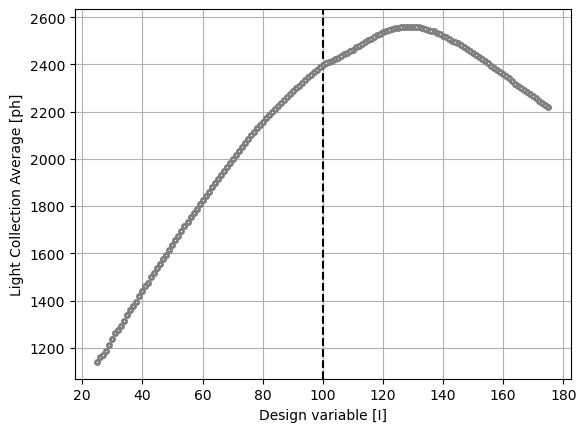

<Figure size 640x480 with 0 Axes>

In [16]:
# Create the plot
fig, ax = plt.subplots()
#ax.errorbar(xval,average, yerr=std_dev, fmt='o',c='gray', capsize=5)
ax.errorbar(xval,average, yerr=std_dev,fmt='o',c='gray', mfc='white', mec='gray', ms=3, mew=2)
# Set the axis labels and titlea
ax.set_xlabel('Design variable [I]')
ax.set_ylabel('Light Collection Average [ph]')
plt.grid()
plt.axvline(x = 100, color = 'k', linestyle = '--')

# Display the plot
fig.savefig("Figures/2307/1DOpt/1Dstudy.pdf")
plt.show()
plt.draw()

In [17]:
import csv

# Export data to CSV
data = np.column_stack((xval, average, std_dev))
header = ['xval', 'average', 'std_dev']

with open('data_1D_opt.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(header)
    writer.writerows(data)

In [18]:
xval, average, std_dev, value_LC = get_matching_values_stats(incrV,LC)
data_sorted = dict(sorted(value_LC.items(), key=lambda x: x[0]))
dd=[]
pv=[]
pvv=[]
posv=[]
dd0=[]
incrV_values = [int(x) for x in data_sorted.keys()]
print(incrV_values)
cc=0
pos=incrV_values[0]
distv=[]
for i in incrV_values:
    if cc<3:
        dd0.extend(data_sorted[i])
        pv.append(i)
        pos=pos+i
        cc+=1
    else:
        pos=pos/cc
        posv.append(sum(pv)/cc)
        distv.append((pv[-1]-pv[0])*0.8)
        pos=i
        pvv.append(pv)
        pv=[i]
        dd.append(dd0)
        dd0=(data_sorted[i])
        cc=1
print(dd[0])
print(len(dd))

print(len(posv))
print(len(distv))
sol=[]
for sublist, p in zip(dd, posv):
    mean = sum(sublist) / len(sublist)
    sol.append(mean)
    if p==101:
        p100=mean
    print(f"Mean of {p}: {mean}")
print(max(sol))
print(p100)
print((max(sol)-p100)/p100*100)

[25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175]
[1145.5953796294964, 1142.792071578993, 1142.0883705244878, 1140.2498271376796, 1141.646582063483, 1140.5908084388075, 1141.5301892227455, 1142.5041178865993, 1141.860101075634, 1143.6061303015265, 1143.1011867162026, 1140.2747874473787, 1141.2089712103736, 1141.1595086597508, 1142.0466078751451, 1145.2879808452565, 1

In [19]:
setup_pgf()
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

geometry_textwidth = 384  # pt
pt_to_inch = 1.0 / 72.27  # Conversion factor from points to inches
plot_width = geometry_textwidth * pt_to_inch *0.5
fig, ax = plt.subplots(figsize=(plot_width, plot_width*0.9))
sol=[]
for sublist, p in zip(dd, posv):
    mean = sum(sublist) / len(sublist)
    sol.append(mean)
    #print(f"Mean of {p}: {mean}")

# Create the boxplot
plt.boxplot(dd, positions=posv, widths=distv, showfliers=True,
                         patch_artist=False,  # Set patch_artist to False
                         whiskerprops=dict(color='blue', linewidth=0.5), capprops=dict(color='blue', linewidth=0.5),
                         medianprops=dict(color='blue', linewidth=0.5), flierprops=dict(marker='o', markersize=1,
                                                                         markerfacecolor='black'), whis=1.5,boxprops=dict(color='blue', linewidth=0.5))



# Plot the averages as scatter points
x_ticks = posv

# Set the x-axis labels to the sorted locations
x_labels = posv

# Define the number of ticks and labels to skip
skip_ticks = 5

# Create a list of filtered x tick indices
x_ticks_filtered = [x_tick for i, x_tick in enumerate(x_ticks) if i % skip_ticks == 0]

# Create a list of filtered x tick labels
x_labels_filtered = [x_label for i, x_label in enumerate(x_labels) if i % skip_ticks == 0]

plt.xticks(x_ticks_filtered, x_labels_filtered)

# Add labels and title
ax.set_xlabel(r"Design variable, I$")
#ax.set_xlabel(r"test")

#ax.set_ylabel(r"Light Collection $\left(\si{\sum\gamma_d}\right)$")  # Set x-axis label with units
ax.set_ylabel(r"Light Output $\left(\si{\sum\gamma_d/\electronvolt}\right)$")  # Set x-axis label with units

plt.grid()

# Add a vertical dotted line at the location of the x-axis tick value closest to 100
plt.axvline(x=100, color='black', linestyle='dotted',linewidth=1)

import numpy as np
import matplotlib.pyplot as plt

x_fit = posv
y_fit = np.polyval(np.polyfit(posv, sol, 3), x_fit)
residuals = sol - y_fit
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_fit - np.mean(y_fit))**2)
r2 = 1 - (ss_res / ss_tot)
params = np.polyfit(posv, sol, 2)  # Store the polynomial coefficients
#label = 'Fit, $R^2$ ${:.2f}$\n${:.1e}x^3{:.1e}x^2+{:.1f}x+{:.1f}$'.format(r2, *params)
#ax.plot(x_fit, sol, 'ro',markersize=1, linestyle='none', linewidth=1, label='Mean')
#label = 'Fit, $R^2$ ${:.2f}$\n${:.1e}x^2+{:.1e}x+{:.1f}$'.format(r2, *params)

#ax.plot(x_fit, y_fit, color='red', linestyle='--', linewidth=0.75, label=label)

# Add the legend to the plot
ax.legend()

# Show the plot
plt.show()

    # Set the number of divisions on the x-axis
num_divisions = 10  # Choose the desired number of divisions
ax.xaxis.set_major_locator(mticker.MaxNLocator(num_divisions))
ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%0i'))  # Set the desired format for tick labels

# Display the plot
plt.show()
plt.savefig("Figures/2307/1DOpt/1DOpt_boxplot_LOP50.pdf", bbox_inches='tight')

 #   boxplot = ax.boxplot(data_in_ranges, positions=box_positions, widths=box_widths, showfliers=True,


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_104927/1602468396.py:73: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()
/tmp/ipykernel_104927/1602468396.py:81: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()
